In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../input/usa-housingcsv/USA_Housing.csv")

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
data.isnull().values.any()

False

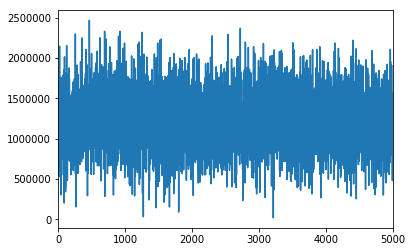

In [8]:
data["Price"].plot()

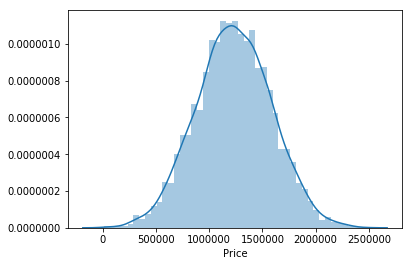

In [9]:
sns.distplot(data["Price"])

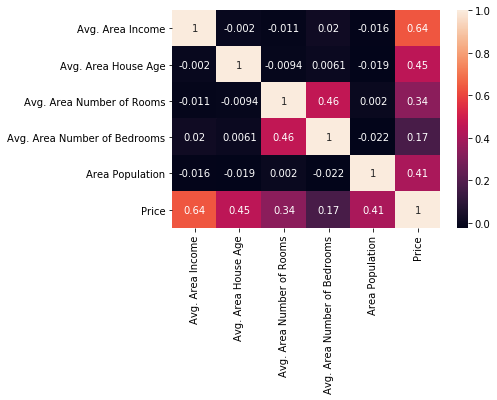

In [10]:
sns.heatmap(data.corr(),annot = True)

In [11]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [12]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [13]:
Y = data["Price"]
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [14]:
x_train, x_test, y_train, y_test = tts( X, Y, test_size = 0.3, random_state = 12 )
y_test.shape

(1500,)

In [15]:
lnr = LinearRegression()
lnr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
x_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4506,72928.965809,7.777006,6.114027,2.46,38728.043462
1273,74622.164347,7.481985,6.059717,3.42,30736.528388
357,72107.428069,4.542306,6.981984,3.00,29981.346541
478,62685.270752,6.057649,6.766130,2.17,42018.938568
356,62431.938100,6.798994,8.599555,4.48,44115.983419


In [17]:
prediction = lnr.predict(x_test)
prediction

array([1551335.88482861, 1415130.25533312,  975520.70923751, ...,
       1215659.38698621, 1448158.7734171 , 1550391.69009401])

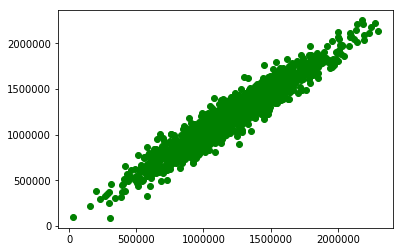

In [18]:
plt.scatter( y_test,prediction,color= "green")

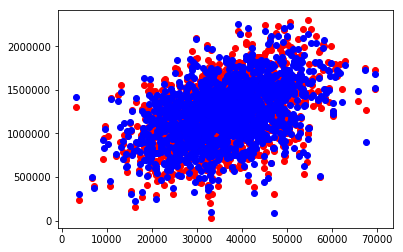

In [19]:
plt.scatter ( x_test['Area Population'], y_test ,color= "red")
plt.scatter ( x_test['Area Population'], prediction ,color= "blue")
 

In [22]:
from sklearn.metrics import  mean_absolute_error
mean_absolute_error(y_test,prediction)

82625.93402837185

In [20]:
from sklearn.metrics import mean_squared_error
err=mean_squared_error(y_test,prediction)
print (err)

10629290086.56244


In [21]:
np.sqrt(err)

103098.44851675723